In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from fancyimpute import KNN

train_path = "res/amazonReviews.800.train.csv"
test_path = "res/amazonReviews.700.test.csv"
result_folder = "results/"

test_set_ratio = 0.1 

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_train.head(10)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,545,5,4,3,2,2,3,1,1,2,...,0,0,0,0,0,0,0,1,0,Engineer
1,800,14,3,2,5,1,1,1,5,0,...,0,0,1,0,0,0,1,1,0,Kolln
2,1390,14,7,4,4,3,3,4,5,2,...,0,0,0,0,0,0,1,0,0,Vernon
3,1161,23,10,7,9,8,1,7,3,1,...,0,0,0,0,0,0,0,0,0,Nigam
4,23,13,3,3,6,1,5,0,3,3,...,0,0,0,0,1,0,0,1,0,Agresti
5,1386,11,16,7,9,9,6,0,2,2,...,0,0,0,0,0,0,1,0,0,Vernon
6,766,12,1,5,6,6,6,2,3,3,...,0,0,0,0,0,0,0,0,0,Koenig
7,1348,11,14,5,8,4,8,7,4,1,...,0,0,0,0,0,1,0,0,0,Sherwin
8,475,6,9,2,3,6,2,6,1,1,...,0,0,1,0,0,0,1,0,0,Cutey
9,132,1,2,6,0,0,0,8,1,2,...,0,0,0,0,0,0,0,0,0,Brody


### Initialize Training data

In [3]:
df_vars = df_train.loc[:, df_train.columns != 'Class']
df_class = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=test_set_ratio, random_state=0)
#clf = DecisionTreeClassifier(min_samples_split=7, random_state=13221323)
clf = MLPClassifier(random_state=123093234)

### Simple cross validation for well-founded results

In [61]:
scores = cross_validate(clf, df_vars, df_class, cv=5)
scores['test_score'].mean()

# dt criterion=gini
# array([0.93854749, 0.9408284 , 0.93125   , 0.90728477, 0.96453901])

0.579432169773242

### Hyper-parameter tuning

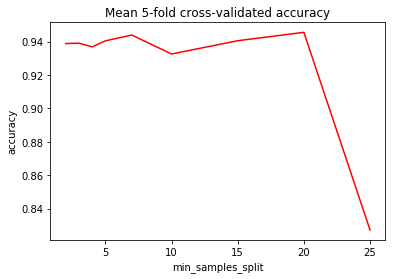

In [37]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Model fitting and sample testing

In [49]:
model = clf.fit(X_train, y_train)
model.score(X_test, y_test)

0.925

### Final prediction

In [50]:
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = pd.Series(model.predict(df_test))
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


### Export

In [51]:
export_file_name = result_folder + "svm_linear.csv"
df_res.to_csv(export_file_name, index=False)

### Easy comparison

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

df_vars = df_train.loc[:, df_train.columns != 'Class']
df_class = df_train['Class']

#df_vars = KNN(k=3).fit_transform(df_vars)

names = ["Nearest Neighbors", "Linear SVM",
         "Decision Tree", "Random Forest",  "Random Forest (Max 1 Feature)", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=.2, random_state=3124132)

for name, clf in zip(names, classifiers):
    try:
        scores = cross_validate(clf, df_vars, df_class, cv=10)
        print(name, "Mean", scores['test_score'].mean(), "-- Min", scores['test_score'].min(), "-- Max", scores['test_score'].max())
    except:
        print("Classification failed for", name)

SyntaxError: invalid syntax (<ipython-input-6-780628a7e7ed>, line 28)